# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Specify the url

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zemio
Processing Record 2 of Set 1 | usinsk
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | kontcha
Processing Record 6 of Set 1 | colonia
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | constantia
Processing Record 9 of Set 1 | lucapa
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | sucua
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | weno
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | elko
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | bala

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,7.56,95,98,1.53,CL,1709521233
1,bredasdorp,-34.5322,20.0403,19.23,95,100,1.99,ZA,1709521234
2,talodi,10.6325,30.3797,25.43,12,36,3.11,SD,1709521234
3,adamstown,-25.0660,-130.1015,24.87,71,3,7.36,PN,1709521235
4,albany,42.6001,-73.9662,9.26,91,91,0.45,US,1709521147


In [ ]:
import os

# Check if the 'output_data' directory exists; if not, create it
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_directory, "cities.csv"), index_label="City_ID")



In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,7.56,95,98,1.53,CL,1709521233
1,bredasdorp,-34.5322,20.0403,19.23,95,100,1.99,ZA,1709521234
2,talodi,10.6325,30.3797,25.43,12,36,3.11,SD,1709521234
3,adamstown,-25.0660,-130.1015,24.87,71,3,7.36,PN,1709521235
4,albany,42.6001,-73.9662,9.26,91,91,0.45,US,1709521147


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

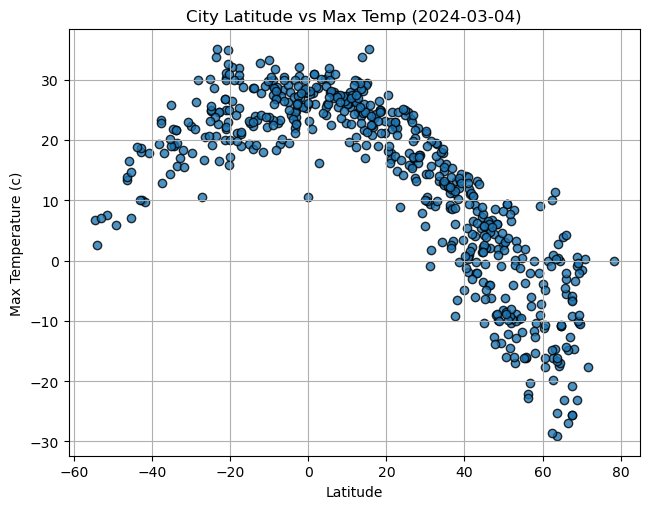

In [5]:
# Create a function to reproduce the scatter plots
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], marker="o",alpha=0.8, edgecolor="black", linewidths=1)
    plt.tight_layout()
    plt.grid()



# Build scatter plot for latitude vs. temperature
build_scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

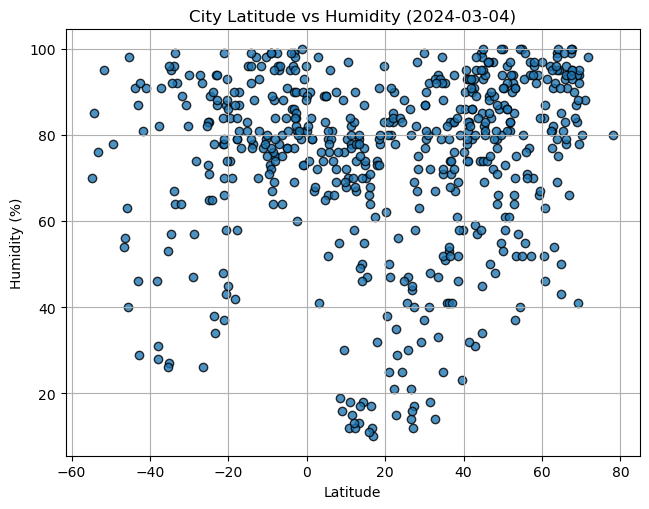

In [6]:
# Build scatter plot for latitude vs. humidity
build_scatter( "Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

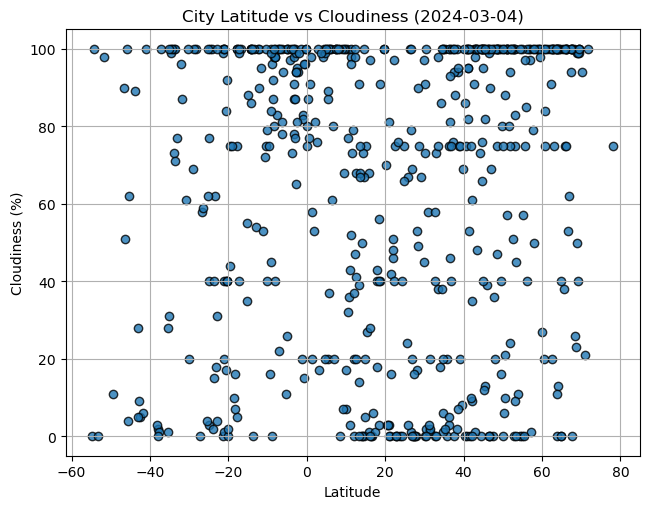

In [7]:
# Build scatter plot for latitude vs. cloudiness
build_scatter( "Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

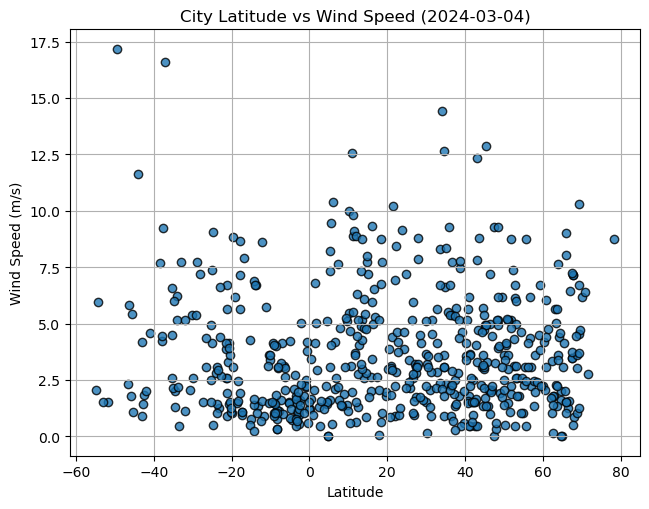

In [8]:
# Build scatter plot for latitude vs. wind speed
build_scatter( "Lat", "Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [9]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, alpha=0.8, marker="o", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,talodi,10.6325,30.3797,25.43,12,36,3.11,SD,1709521234
4,albany,42.6001,-73.9662,9.26,91,91,0.45,US,1709521147
6,newman,37.3138,-121.0208,11.25,83,76,1.34,US,1709521237
7,sitka,57.0531,-135.3300,-7.54,52,1,2.22,US,1709521238
8,plastun,44.7561,136.2939,-3.50,34,76,5.70,RU,1709521238


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,7.56,95,98,1.53,CL,1709521233
1,bredasdorp,-34.5322,20.0403,19.23,95,100,1.99,ZA,1709521234
3,adamstown,-25.0660,-130.1015,24.87,71,3,7.36,PN,1709521235
5,mount gambier,-37.8333,140.7667,23.31,31,2,4.24,AU,1709521236
9,edinburgh of the seven seas,-37.0676,-12.3116,17.93,91,100,16.58,SH,1709521239


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8879021315091191


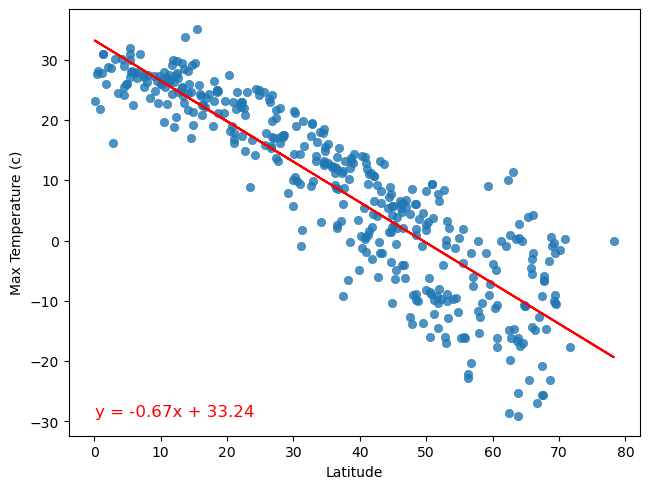

In [12]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.6397400037488709


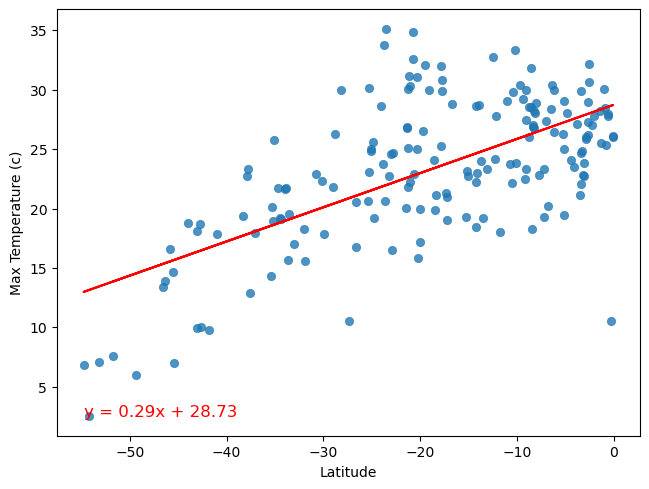

In [13]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** 

=> The r-value of approximately -0.89 shows that there is strong negative correlation between Max Temperature and latitude on the northern hemisphere. Specifically, as you move farther north (higher latitude), the maximum temperature tends to decrease.The negative sign of r indicates that as latitude increases (moving toward the North Pole), the maximum temperature decreases. 

=> On the other hand, the r-value of approximately 0.64 indicates that there is a moderate positive relationship between Max Temperature and latitude on southern hemisphere. As latitude increases (moving toward the South Pole), there is a moderate tendency for the maximum temperature to increase. The positive sign of r indicates that as latitude increases (moving toward lower latitudes), the maximum temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32811672883378873


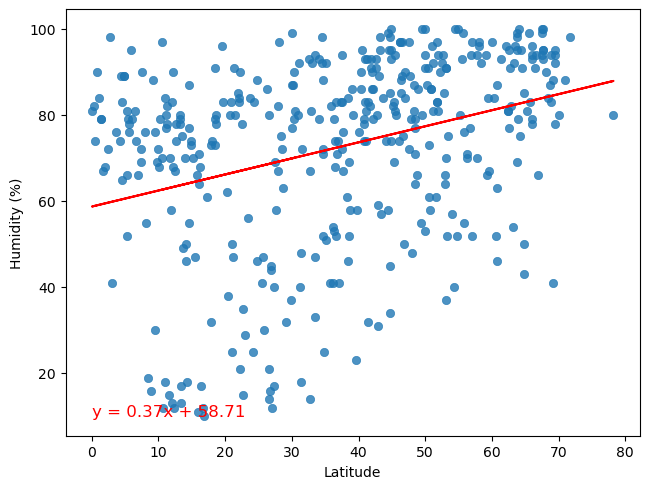

In [14]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.30824052313183264


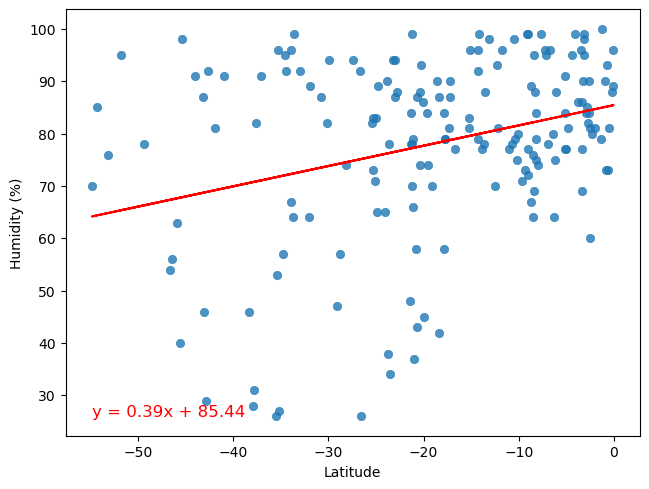

In [15]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** 

=> In this case, the provided r-value of approximately 0.33 suggests a weak positive correlation between latitude and humidity in the Northern Hemisphere. As latitude increases (moving toward the North Pole), there is a slight tendency for humidity to increase.
However, the correlation is not very strong, as indicated by the relatively low r-value.

=> Here the provided r-value of approximately 0.31 suggests a weak positive correlation between latitude and humidity in the Southern Hemisphere. As latitude increases (moving toward the South Pole), there is a slight tendency for humidity to increase.
However, the correlation is not very strong, as indicated by the relatively low r-value.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18823526566749857


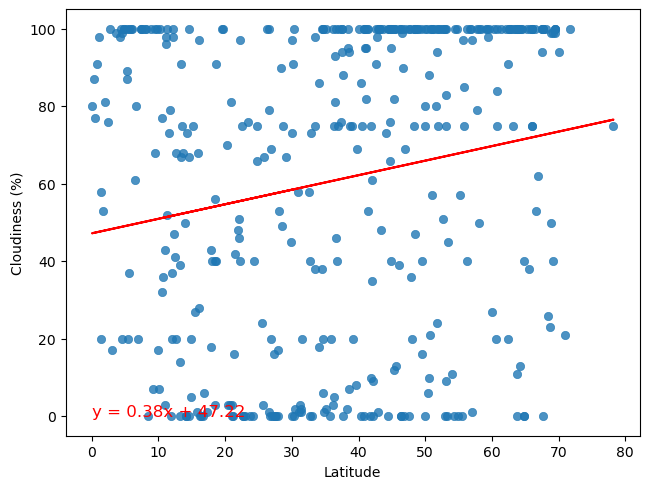

In [16]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.3358822964316111


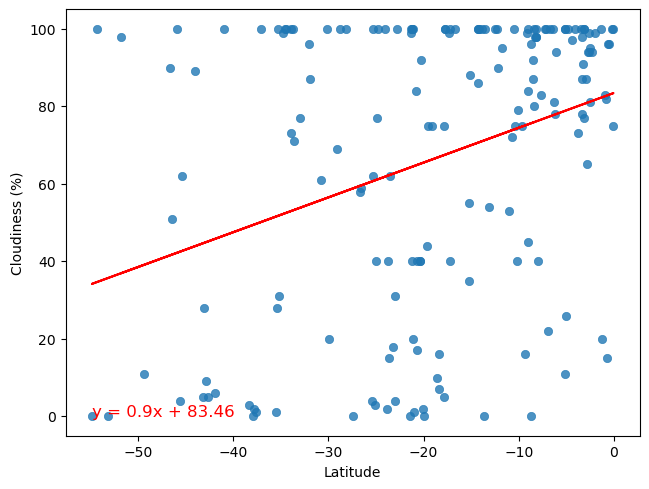

In [17]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** 

=> In this case, the provided r-value of approximately 0.19 suggests a weak positive correlation between latitude and cloudiness in the Northern Hemisphere. As latitude increases (moving toward the North Pole), there is a slight tendency for cloudiness to increase.
However, the correlation is not very strong, since the r-value is relatively low.

=> In the Southern Hemisphere also the provided r-value of approximately 0.34 suggests a weak positive correlation between latitude and cloudiness. As latitude increases (moving toward the South Pole), there is a slight tendency for cloudiness to increase.
However, the correlation is not very strong, as indicated by the relatively low r-value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.046261577263098194


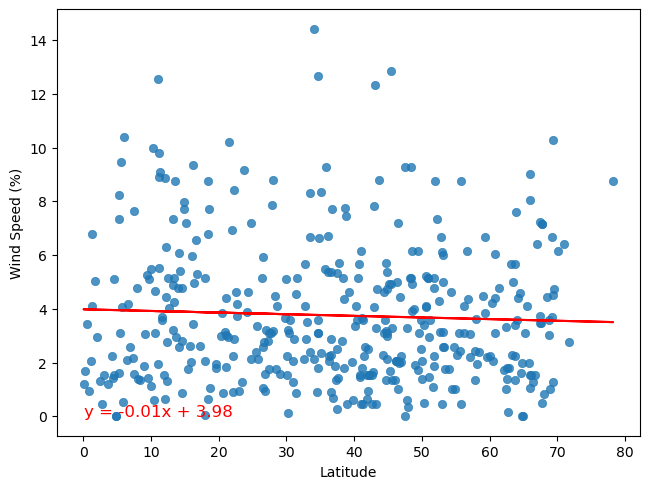

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.show()

The r-value is: -0.36681898689295345


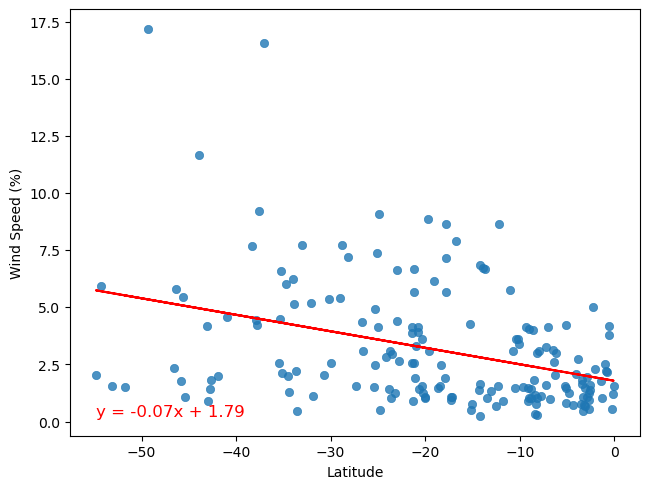

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.show()

**Discussion about the linear relationship:** 

=> In the northern hemisphere, the provided r-value of approximately -0.05 suggests a very weak negative correlation between latitude and wind speed. As latitude increases (moving toward the North Pole), there is a very slight tendency for wind speed to decrease.
However, the correlation is extremely weak, as indicated by the very low r-value.

=> In the southern hemisphere, the provided r-value of approximately -0.37 suggests a weak negative correlation between latitude and wind speed. As latitude increases (moving toward the South Pole), there is a slight tendency for wind speed to decrease.
However, the correlation is not very strong, as indicated by the relatively low r-value.

